In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('MoviesOnStreamingPlatforms.csv', sep=',')

In [32]:
df.replace(np.nan, None, inplace=True)
df.dropna(inplace=True)

In [33]:
df['Age'] = df['Age'].fillna('0+')
df['Age'] = df['Age'].replace('all', '0+')

In [34]:
def genre_converter(rating_string: str):
    return int(str(rating_string).split('/')[0])

df['RT rating'] = df['Rotten Tomatoes'].apply(lambda x: genre_converter(x))

In [35]:
df.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type,RT rating
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.0,5338.000000
mean,4608.876546,4609.876546,2008.515362,0.355564,0.134507,0.405583,0.135819,0.0,58.465155
std,2860.315830,2860.315830,14.275385,0.478729,0.341229,0.491050,0.342628,0.0,12.654353
min,0.000000,1.000000,1919.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000
25%,1840.000000,1841.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.0,49.000000
50%,4797.500000,4798.500000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.0,58.000000
75%,6841.750000,6842.750000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.0,67.000000
max,9514.000000,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.0,98.000000


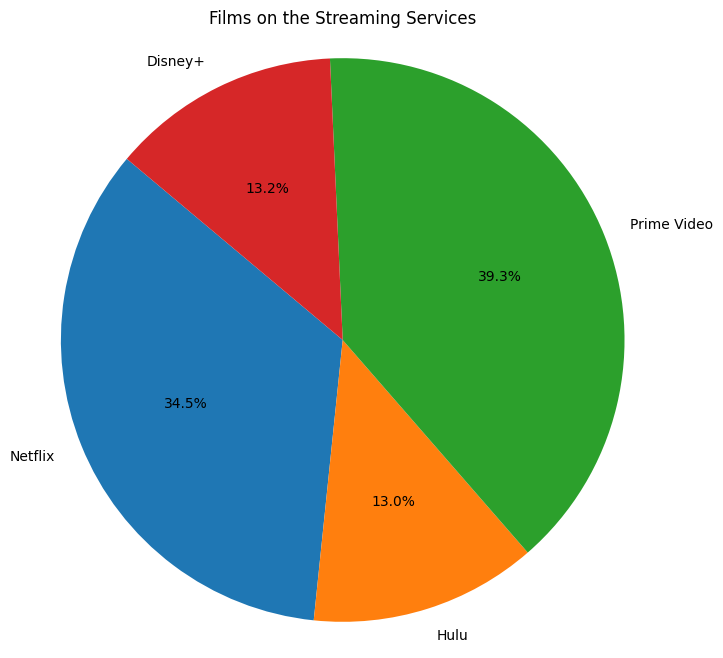

In [36]:
streaming_sums = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()

plt.figure(figsize=(8, 8))
plt.pie(streaming_sums, labels=streaming_sums.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Films on the Streaming Services')

plt.show()

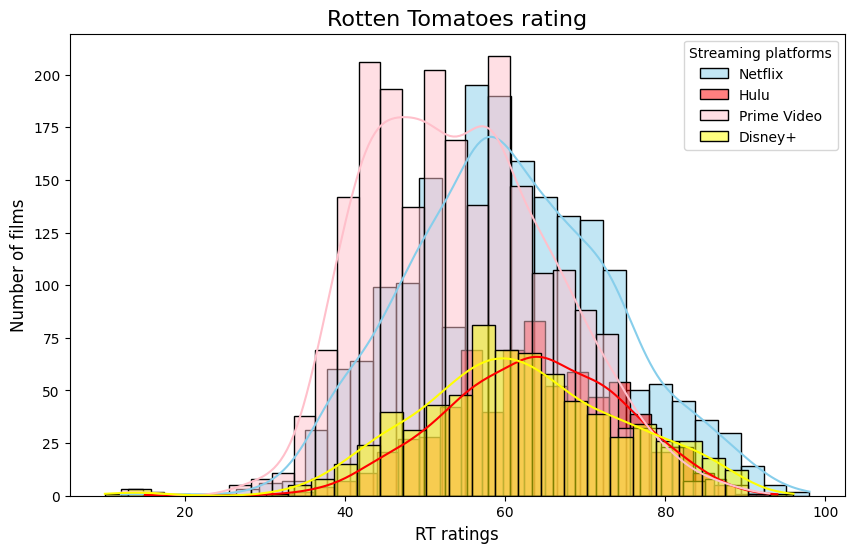

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Netflix']==1]['RT rating'], bins=30, kde=True, color='skyblue', label='Netflix')
sns.histplot(df[df['Hulu']==1]['RT rating'], bins=30, kde=True, color='red', label='Hulu')
sns.histplot(df[df['Prime Video']==1]['RT rating'], bins=30, kde=True, color='pink', label='Prime Video')
sns.histplot(df[df['Disney+']==1]['RT rating'], bins=30, kde=True, color='yellow', label='Disney+')
plt.title('Rotten Tomatoes rating', fontsize=16)
plt.xlabel('RT ratings', fontsize=12)
plt.ylabel('Number of films', fontsize=12)
plt.legend(title='Streaming platforms')
plt.show()

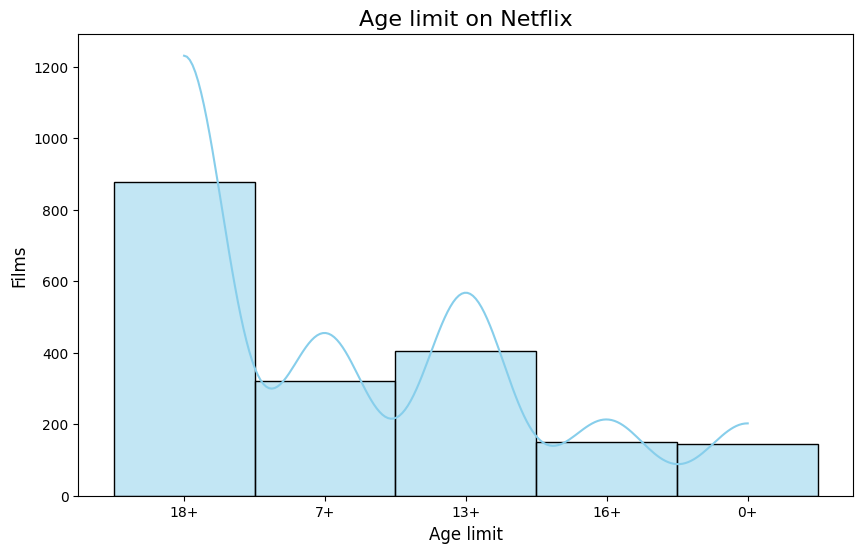

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Netflix']==1]['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age limit on Netflix', fontsize=16)
plt.xlabel('Age limit', fontsize=12)
plt.ylabel('Films', fontsize=12)
plt.show()

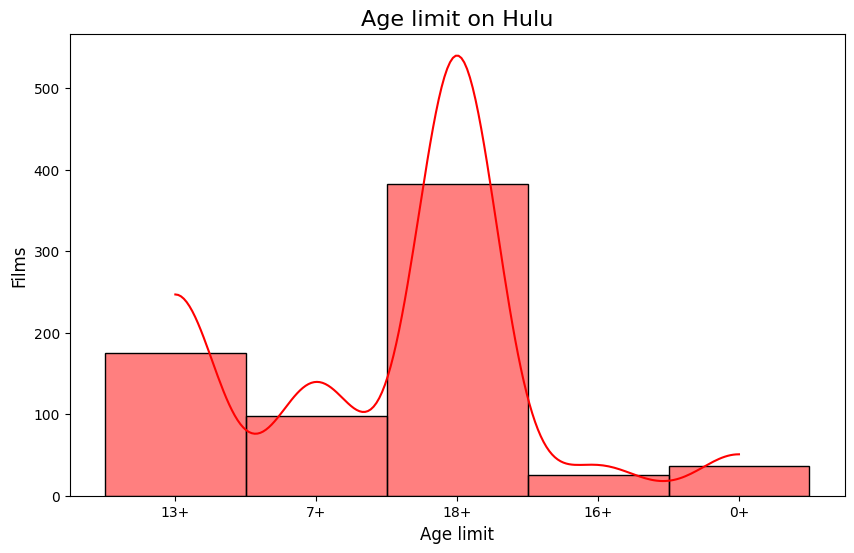

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Hulu']==1]['Age'], bins=30, kde=True, color='red')
plt.title('Age limit on Hulu', fontsize=16)
plt.xlabel('Age limit', fontsize=12)
plt.ylabel('Films', fontsize=12)
plt.show()

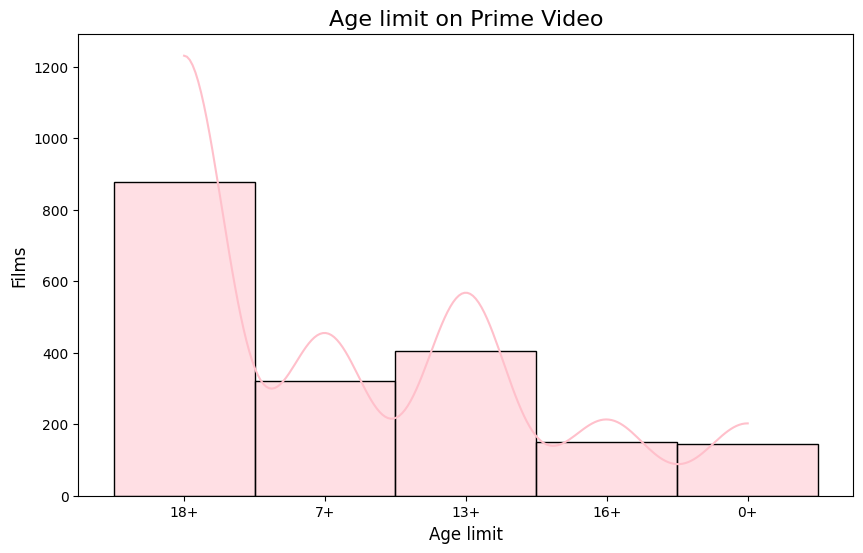

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Netflix']==1]['Age'], bins=30, kde=True, color='pink')
plt.title('Age limit on Prime Video', fontsize=16)
plt.xlabel('Age limit', fontsize=12)
plt.ylabel('Films', fontsize=12)
plt.show()

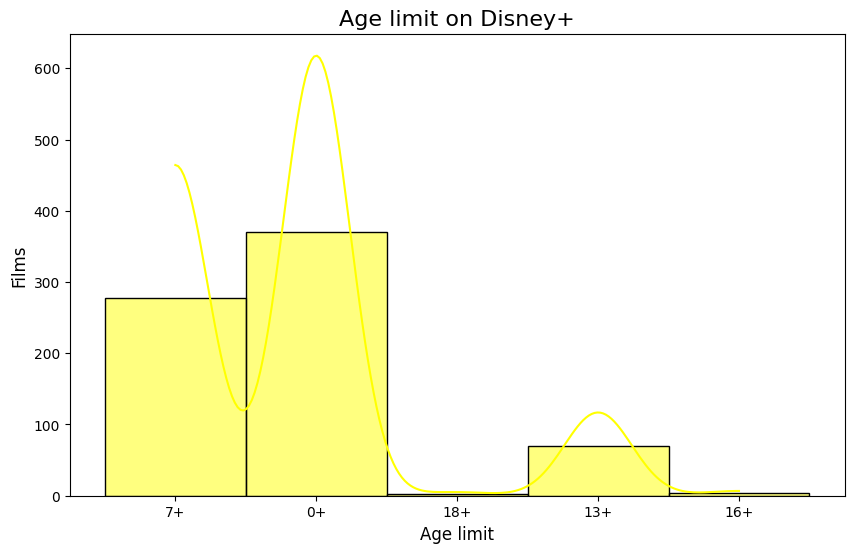

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Disney+']==1]['Age'], bins=30, kde=True, color='yellow')
plt.title('Age limit on Disney+', fontsize=16)
plt.xlabel('Age limit', fontsize=12)
plt.ylabel('Films', fontsize=12)
plt.show()

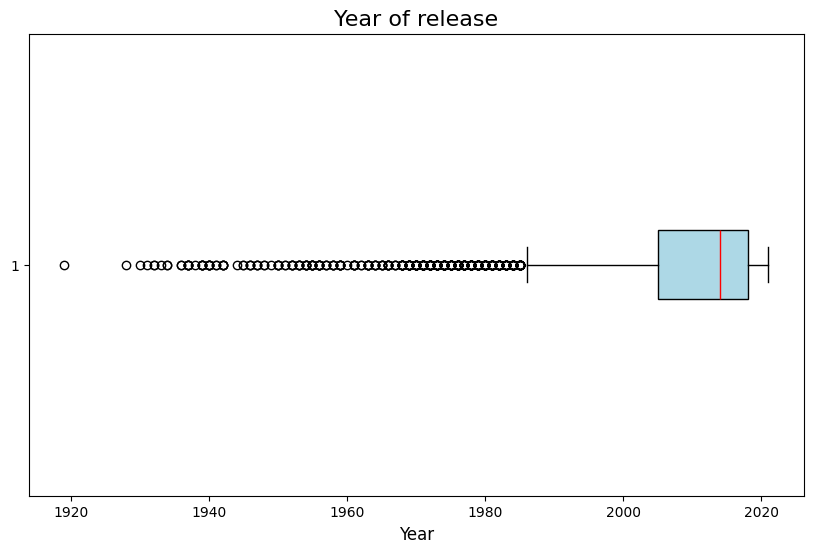

In [42]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Year'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title('Year of release', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.show()

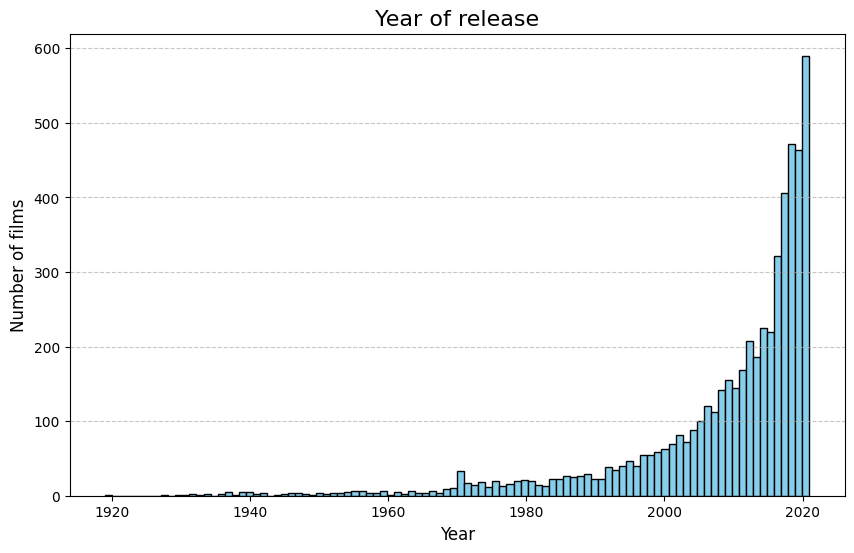

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Year'] < 2022]['Year'], bins=100, color='skyblue', edgecolor='black')
plt.title('Year of release', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of films', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()